In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
path = 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/*V2.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/expensive_nuclear/IL_XN_CC30_52.sqlite')
data_files

['simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2010_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2011_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2012_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2013_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2014_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2015_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2016_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2017_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2018_52_V2.sqlite',
 'simulations/illinois/expensive_nuclear_RE_sensitivity/data_files/IL_XN_S2010_W2019_52_V2.sqlite',


In [4]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-4-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [5]:
df.fillna(0, inplace=True)
df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value,NUCLEAR_ADV,COAL_ADV,NATGAS_ADV
year,,,,,,,,,,,
2050,2714.6166,2255.6,39813.245,688.8,12420.0,57065.811,24837.749,156221.644879,0.000000,0.0,0.0
2050,3826.8516,2255.6,35331.663,688.8,12420.0,47783.583,27266.479,152978.632488,0.000000,0.0,0.0
2050,7487.5953,2255.6,31328.838,688.8,12420.0,29676.528,32188.907,157709.649171,0.000000,0.0,0.0
2050,4647.7844,2255.6,38284.279,688.8,12420.0,53467.055,21609.145,154773.396960,0.000004,0.0,0.0
2050,7527.5134,2255.6,33726.666,688.8,12420.0,44425.275,25016.957,159020.901028,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2050,5614.9559,2255.6,31340.093,688.8,12420.0,46515.466,18279.600,161912.096378,2891.862100,0.0,0.0
2050,6297.4327,2255.6,37565.676,688.8,12420.0,52405.262,21484.592,161385.122481,304.830170,0.0,0.0
2050,4642.4560,2255.6,34715.012,688.8,12420.0,48978.861,27954.833,156198.017837,0.000000,0.0,0.0


In [6]:
df.describe()

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value,NUCLEAR_ADV,COAL_ADV,NATGAS_ADV
count,122.000000,122.000000,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5290.976198,2255.600004,34540.739926,688.800005,12420.0,49768.363615,23551.513246,158187.937757,605.797511,0.000003,0.000240
std,1532.765734,0.000033,3454.723067,0.000042,0.0,7831.855825,4539.545310,3499.508717,1615.033357,0.000025,0.002071
min,1601.775400,2255.600000,22549.838000,688.800000,12420.0,29676.528000,10004.046000,141064.840562,0.000000,0.000000,0.000000
25%,4064.051150,2255.600000,33192.445750,688.800000,12420.0,44109.079750,21515.730250,156210.443537,0.000000,0.000000,0.000000
50%,4985.355950,2255.600000,35523.221000,688.800000,12420.0,49824.044000,24331.576000,157877.671307,0.000000,0.000000,0.000000
75%,6451.966825,2255.600000,36903.935500,688.800000,12420.0,55945.274500,26742.010250,160544.233643,0.000003,0.000000,0.000000
max,8415.245700,2255.600300,39813.245000,688.800360,12420.0,67192.195000,32188.907000,165831.449804,6958.998200,0.000210,0.021600


In [7]:
techs = ['BIOMASS',
 'COAL_CONV',
 'LI_BATTERY',
 'NATGAS_CONV',
 'NUCLEAR_CONV',
 'SOLAR_FARM',
 'WIND_FARM',
 'NUCLEAR_ADV',
 'COAL_ADV',
 'NATGAS_ADV']

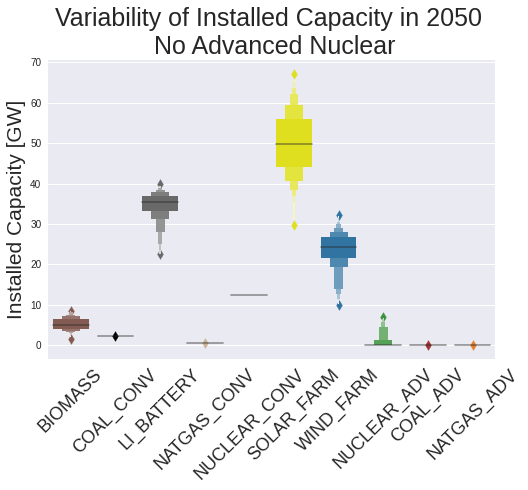

In [22]:
# plt.style.use('seaborn')
plt.figure.figsize = (12,9)
# (df[techs]/1000).boxplot()
sb.boxenplot(data=(df[techs]/1000), palette=elc_colors)

plt.title('Variability of Installed Capacity in 2050 \n No Advanced Nuclear', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=18, rotation=45)
plt.show()

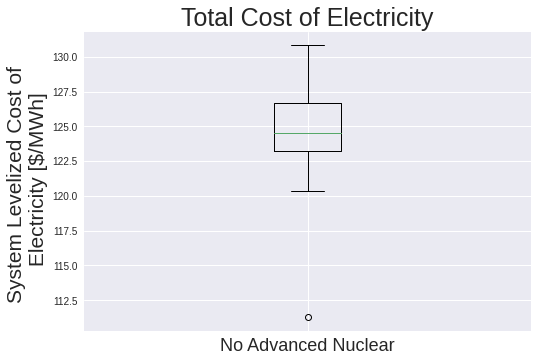

In [9]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['No Advanced Nuclear'],fontsize=18)
plt.show()

In [10]:
df = df.reset_index().drop(columns='year')

In [11]:
(df['Objective_Value']).to_csv('data/objective_value_XN_V2.csv')

<AxesSubplot:>

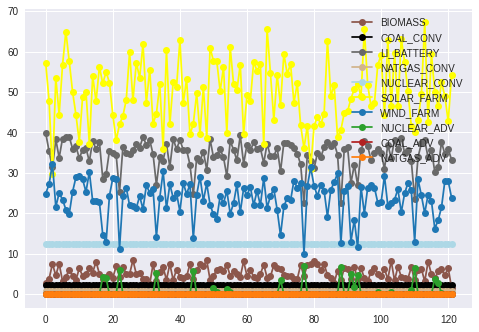

In [12]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

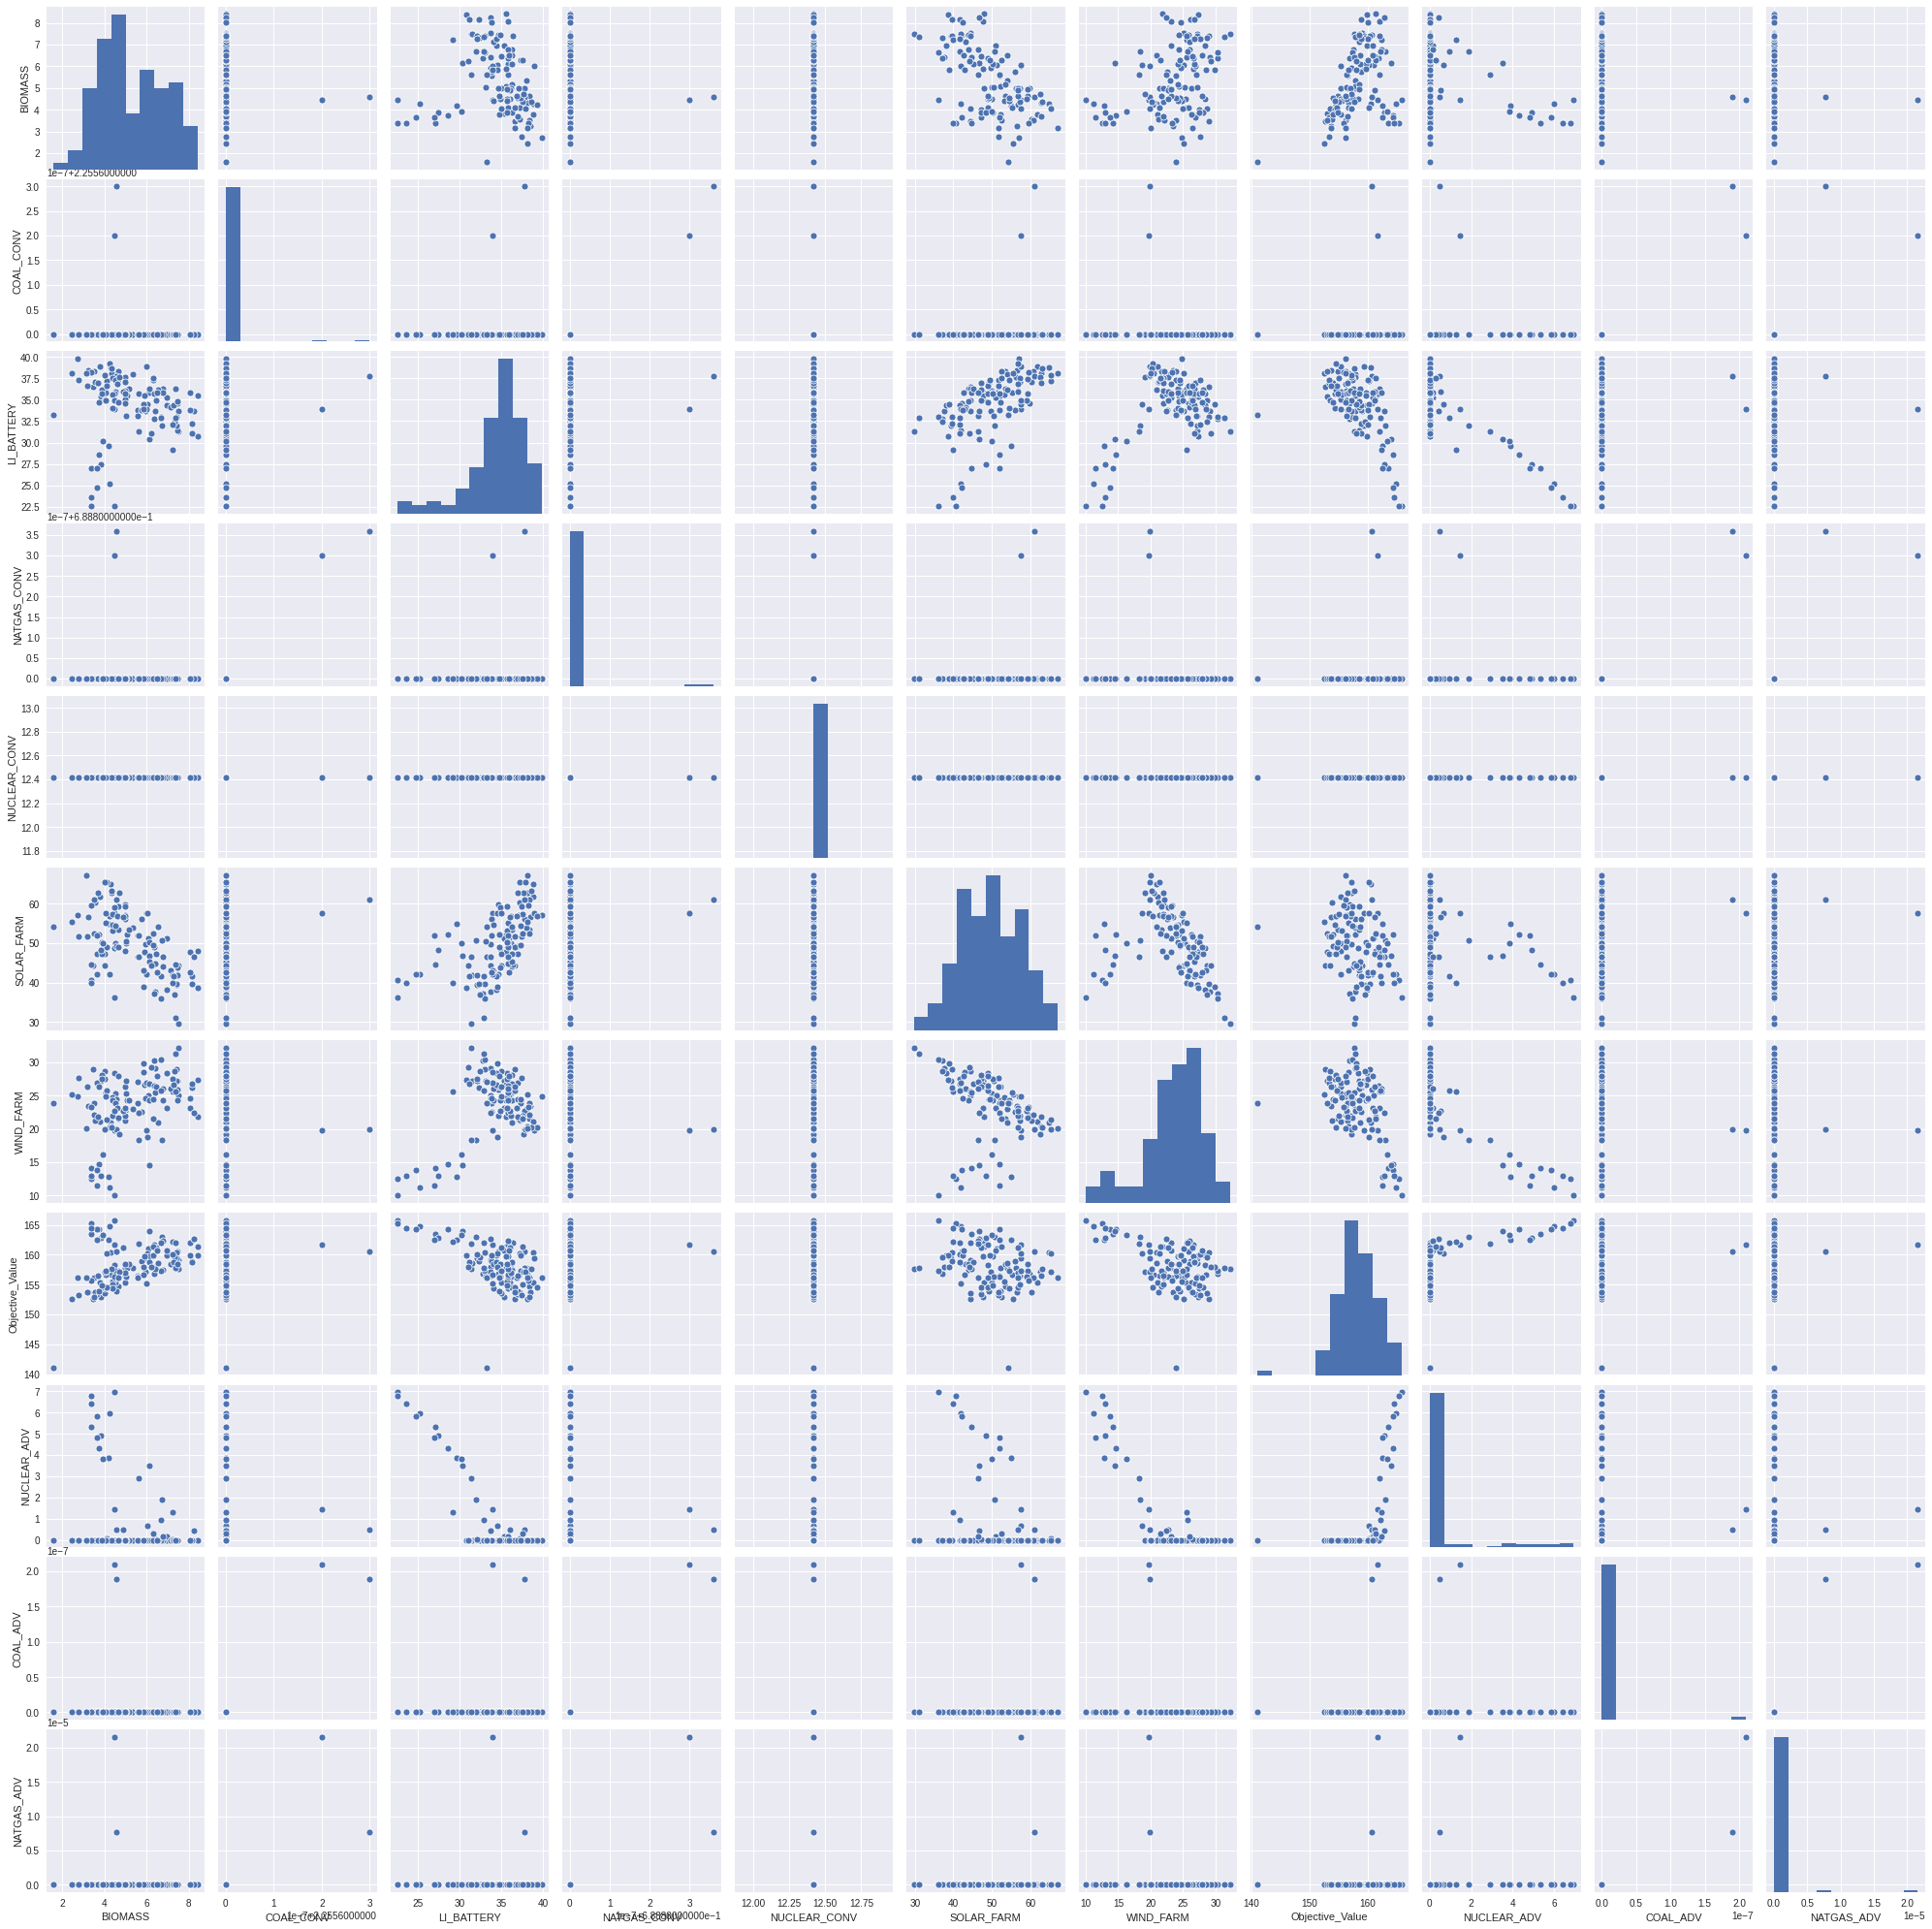

In [13]:
sb.pairplot(df/1000)

In [14]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [15]:
fulldf.fillna(0, inplace=True)
fulldf

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,NUCLEAR_ADV,COAL_ADV,NATGAS_ADV
year,,,,,,,,,,
2025,0.0000,7505.90,1423.4405,16371.60,12420.0,267.200,9606.6619,0.0,0.0,0.0
2030,2714.6166,5045.24,27024.1790,16332.70,12420.0,38767.026,17138.1500,0.0,0.0,0.0
2035,2714.6166,2815.74,30237.2080,15903.98,12420.0,43376.248,18999.3340,0.0,0.0,0.0
2040,2714.6166,2444.40,33437.9430,5023.32,12420.0,47958.540,20910.2160,0.0,0.0,0.0
2045,2714.6166,2357.04,36625.5940,688.80,12420.0,52512.175,22873.9830,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2030,1601.7754,5045.24,22832.1960,16332.70,12420.0,37965.299,16659.2210,0.0,0.0,0.0
2035,1601.7754,2815.74,25443.8940,15903.98,12420.0,42049.011,18444.6810,0.0,0.0,0.0
2040,1601.7754,2444.40,28055.5130,5023.32,12420.0,46132.513,20230.4370,0.0,0.0,0.0


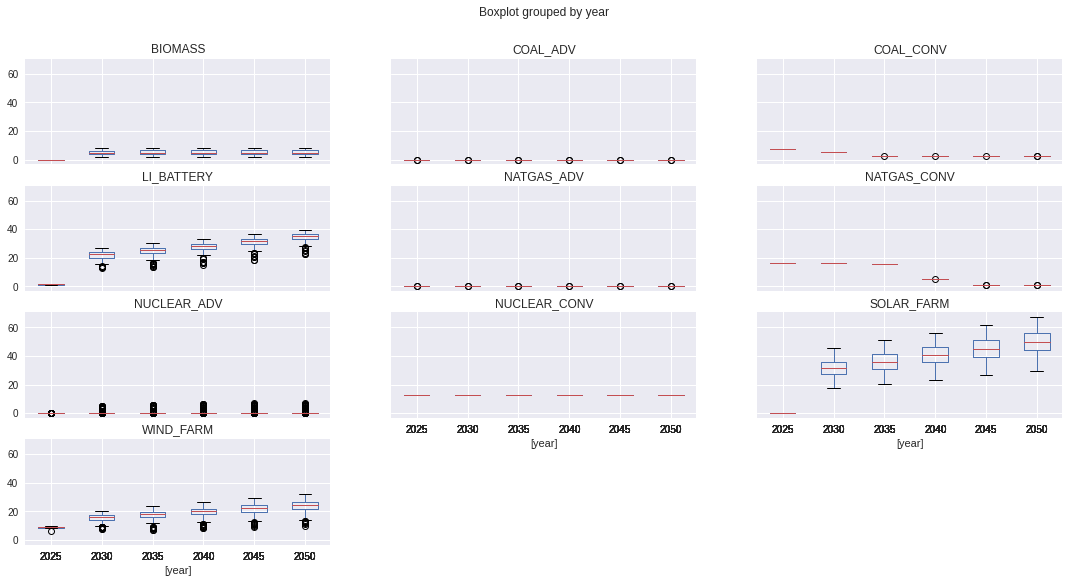

In [16]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [17]:
conn = sqlite3.connect('simulations/illinois/expensive_nuclear/IL_XN_CC30_52.sqlite')

In [18]:
get_objective(conn)

141064.84056164636

In [19]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_XN_V2.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_XN_V2.csv')